### OLS Task02

#### 한국 아파트 가격 예측
https://drive.google.com/file/d/1v3eNjo3TjTgUPlq6Uw_v_oEQ8sVjaItw/view?usp=share_link

In [37]:
import pandas as pd

c_df = pd.read_csv('./datasets/korean_apart.csv',low_memory=False)

c_df

,지역코드,동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [38]:
c_df = c_df.drop_duplicates()
c_df = c_df.dropna()
c_df = c_df.drop(labels=['거래일'], axis=1)

In [97]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4688888 entries, 0 to 5002838
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지역코드    float64
 1   동       object 
 2   아파트     object 
 3   지번      object 
 4   전용면적    float64
 5   층       object 
 6   건축년도    float64
 7   거래금액    object 
dtypes: float64(3), object(5)
memory usage: 322.0+ MB


In [41]:
# c_df = c_df.drop(labels=['동', '아파트','지번'], axis=1)

from sklearn.preprocessing import LabelEncoder

columns = ['동', '아파트', '지번']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(c_df[column])
    label_encoders[column] = encoder.classes_
    c_df[column] = result

label_encoders

{'동': array(['가경동', '가곡동', '가남읍 신해리', ..., '흥해읍 초곡리', '흥해읍 학성리', '흥해읍 학천리'],
       dtype=object),
 '아파트': array(['(1-102)', '(1018-8)', '(1028-0)', ..., '힐하우스', '힐하우스(577-79)',
        '힐하우스(802-3)'], dtype=object),
 '지번': array(['1', '1-1', '1-10', ..., '지구BL 5', '지구BL 7', '지구BL 8'],
       dtype=object)}

In [40]:
import numpy as np

# '학성동'과 같은 문자열을 포함한 행을 모두 제거합니다.
c_df = c_df[~c_df.drop(columns=['동']).astype(str).eq('학성동').any(axis=1)]

# 빈 문자열(' ')을 NaN 값으로 대체합니다.
c_df['층'] = c_df['층'].replace(' ', np.nan)

# NaN 값을 가진 행을 제거합니다.
c_df = c_df.dropna(subset=['층'])

# 각 열의 데이터 타입을 정수형으로 변환합니다.
c_df['지역코드'] = c_df['지역코드'].astype(int)
# c_df['전용면적'] = c_df['전용면적'].astype(float)  # 실수형으로 변환
c_df['층'] = c_df['층'].astype(float)  # 실수형으로 변환
c_df['건축년도'] = c_df['건축년도'].astype(int)

# '층' 열에서 실수값을 가진 행을 제거합니다.
c_df = c_df.dropna(subset=['층'])

# '거래금액' 열에서 NaN 값을 가진 행을 제거합니다.
c_df = c_df.dropna(subset=['거래금액'])

# '거래금액' 열의 쉼표(,)를 제거합니다.
c_df['거래금액'] = c_df['거래금액'].str.replace(',', '')

# '거래금액' 열의 데이터 타입을 정수형으로 변환합니다.
c_df['거래금액'] = c_df['거래금액'].astype(int)

# 결과 확인
print(c_df.dtypes)


지역코드      int32
동        object
아파트      object
지번       object
전용면적    float64
층       float64
건축년도      int32
거래금액      int32
dtype: object


In [8]:
c_df = c_df.drop(labels=['지역코드', '동','지번'], axis=1)

In [42]:
c_df.corr()['거래금액'].sort_values(ascending=False)[1:]

전용면적    0.482380
층       0.191624
건축년도    0.184829
지번      0.002537
동      -0.006507
아파트    -0.034030
지역코드   -0.443396
Name: 거래금액, dtype: float64

In [9]:
c_df

,아파트,전용면적,층,건축년도,거래금액
4259840,2201,84,12,2011,42000
4259841,2198,84,1,2011,35000
4259842,24287,59,13,2005,21000
4259843,34458,134,10,2000,47400
4259844,24287,84,11,2005,26800
...,...,...,...,...,...
5002834,7675,57,6,2019,19500
5002835,28184,49,2,1999,21700
5002836,17120,45,1,2000,9300
5002837,28524,51,2,2003,25500


In [7]:
c_df

,지역코드,동,아파트,지번,전용면적,층,건축년도,거래금액
4259840,41610,2822,2201,15936,84,12,2011,42000
4259841,41610,2822,2198,15925,84,1,2011,35000
4259842,41610,2822,24287,15897,59,13,2005,21000
4259843,41610,2822,34458,10247,134,10,2000,47400
4259844,41610,2822,24287,15897,84,11,2005,26800
...,...,...,...,...,...,...,...,...
5002834,50130,657,7675,1954,57,6,2019,19500
5002835,50130,814,28184,4586,49,2,1999,21700
5002836,50130,1436,17120,5944,45,1,2000,9300
5002837,50130,2566,28524,5091,51,2,2003,25500


In [43]:
from statsmodels.api import OLS

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):             1113481.206
Model:                            OLS   Adj. R-squared (uncentered):        1113482.858
Method:                 Least Squares   F-statistic:                         -6.741e+05
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        1.00
Time:                        22:43:27   Log-Likelihood:                     -5.3756e+07
No. Observations:             4718433   AIC:                                  1.075e+08
Df Residuals:                 4718426   BIC:                                  1.075e+08
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [45]:
get_vif(features)

,vif_score,feature
0,10.693077,지역코드
1,4.371371,동
2,4.506649,아파트
3,3.874095,지번
4,9.697463,전용면적
5,3.199117,층
6,28.259373,건축년도


In [46]:
c_df = c_df.drop(labels=['건축년도',], axis=1)

In [47]:
from statsmodels.api import OLS

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):             1172718.938
Model:                            OLS   Adj. R-squared (uncentered):        1172720.429
Method:                 Least Squares   F-statistic:                         -7.864e+05
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        1.00
Time:                        22:45:28   Log-Likelihood:                     -5.3878e+07
No. Observations:             4718433   AIC:                                  1.078e+08
Df Residuals:                 4718427   BIC:                                  1.078e+08
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [49]:
get_vif(features)

,vif_score,feature
0,7.086540,지역코드
1,4.120255,동
2,4.212517,아파트
3,3.517166,지번
4,6.886711,전용면적
5,3.059991,층


In [50]:
c_df.corr()['거래금액'].sort_values(ascending=False)[1:]

전용면적    0.482380
층       0.191624
지번      0.002537
동      -0.006507
아파트    -0.034030
지역코드   -0.443396
Name: 거래금액, dtype: float64

In [51]:
c_df = c_df.drop(labels=['지번',], axis=1)

In [63]:
from statsmodels.api import OLS

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      f   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                          2.325e+07
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        0.00
Time:                        22:49:29   Log-Likelihood:                     -9.9450e+06
No. Observations:             4718433   AIC:                                  1.989e+07
Df Residuals:                 4718428   BIC:                                  1.989e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [65]:
get_vif(features)

,vif_score,feature
0,6.674208,a
1,4.100575,b
2,4.151858,c
3,6.573649,d
4,3.051440,e


<Axes: >

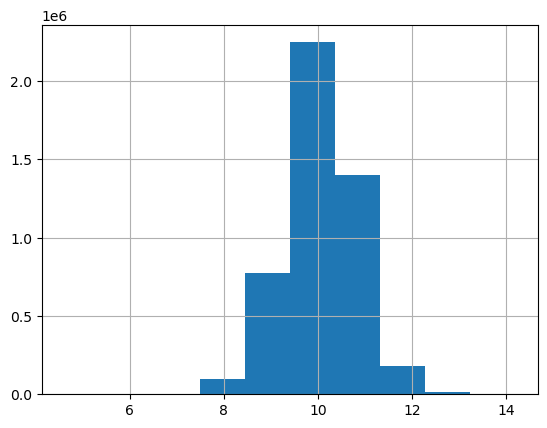

In [62]:
c_df.f.hist()

In [56]:
c_df.columns = ['a', 
                    'b', 
                    'c', 
                    'd',
                    'e', 
                    'f', 
                    # 'Spending_Score', 
                   #  'Artist', 
                   #  'Doctor', 
                   #  'Engineer', 
                   #  'Entertainment',
                   # 'Executive', 
                   #  'Healthcare',
                   # 'Homemaker', 
                   # 'Lawyer', 
                   # 'Marketing', 
                   # 'nan', 
                   ]

c_df

,a,b,c,d,e,f
0,31110,2977,5204,135.5800,8.0,26700
1,31110,447,5193,101.6000,2.0,35500
2,31110,447,22332,84.9920,11.0,36500
3,31110,447,5193,118.7060,8.0,43000
4,31110,447,5194,84.9636,7.0,38700
...,...,...,...,...,...,...
5002834,50130,657,7675,57.1300,6.0,19500
5002835,50130,814,28184,49.8700,2.0,21700
5002836,50130,1436,17120,45.3100,1.0,9300
5002837,50130,2566,28524,51.8800,2.0,25500


In [61]:
c_df.f.value_counts()

f
9.903538     37453
10.126671    37402
10.043293    35530
9.798183     34963
10.308986    34515
             ...  
10.694374        1
11.557641        1
11.568956        1
11.383045        1
10.575820        1
Name: count, Length: 28057, dtype: int64

In [60]:
c_df['f'] = np.log1p(c_df['f'])

In [66]:
from statsmodels.api import OLS

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      f   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                          2.325e+07
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        0.00
Time:                        22:50:04   Log-Likelihood:                     -9.9450e+06
No. Observations:             4718433   AIC:                                  1.989e+07
Df Residuals:                 4718428   BIC:                                  1.989e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [68]:
get_vif(features)

,vif_score,feature
0,6.674208,a
1,4.100575,b
2,4.151858,c
3,6.573649,d
4,3.051440,e


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [69]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [73]:
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 0.2660, RMSE: 0.5158, MSLE: 0.0022, RMSLE: 0.0472, R2: 0.5308


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_teatures = PolynomialFeatures(degree=2).fit_transform(features)


In [135]:
c_df = c_df.drop(labels=['지역코드'], axis=1)

In [136]:
from statsmodels.api import OLS

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):             -372056.548
Model:                            OLS   Adj. R-squared (uncentered):        -372061.746
Method:                 Least Squares   F-statistic:                         -7.157e+04
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        1.00
Time:                        15:12:30   Log-Likelihood:                     -5.1360e+06
No. Observations:              429450   AIC:                                  1.027e+07
Df Residuals:                  429444   BIC:                                  1.027e+07
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [137]:
get_vif(features)

,vif_score,feature
0,0.006374,동
1,-0.000011,아파트
2,0.000012,지번
3,-7.550510,전용면적
4,3.159318,층
5,0.017664,건축년도


In [138]:
c_df = c_df.drop(labels=['건축년도'], axis=1)

In [139]:
from statsmodels.api import OLS

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):             -379564.872
Model:                            OLS   Adj. R-squared (uncentered):        -379569.291
Method:                 Least Squares   F-statistic:                         -8.589e+04
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        1.00
Time:                        15:12:46   Log-Likelihood:                     -5.1403e+06
No. Observations:              429450   AIC:                                  1.028e+07
Df Residuals:                  429445   BIC:                                  1.028e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [140]:
get_vif(features)

,vif_score,feature
0,0.005643,동
1,-0.000009,아파트
2,0.000011,지번
3,-4.683049,전용면적
4,2.949098,층


In [141]:
c_df = c_df.drop(labels=['동'], axis=1)

In [142]:
from statsmodels.api import OLS

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):             -381493.997
Model:                            OLS   Adj. R-squared (uncentered):        -381497.551
Method:                 Least Squares   F-statistic:                         -1.074e+05
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        1.00
Time:                        15:13:11   Log-Likelihood:                     -5.1414e+06
No. Observations:              429450   AIC:                                  1.028e+07
Df Residuals:                  429446   BIC:                                  1.028e+07
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [143]:
get_vif(features)

,vif_score,feature
0,-0.000008,아파트
1,0.000010,지번
2,-4.238736,전용면적
3,2.926427,층


In [144]:
c_df = c_df.drop(labels=['아파트'], axis=1)

In [145]:
from statsmodels.api import OLS

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):             -387763.086
Model:                            OLS   Adj. R-squared (uncentered):        -387765.795
Method:                 Least Squares   F-statistic:                         -1.431e+05
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        1.00
Time:                        15:13:29   Log-Likelihood:                     -5.1449e+06
No. Observations:              429450   AIC:                                  1.029e+07
Df Residuals:                  429447   BIC:                                  1.029e+07
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [146]:
get_vif(features)

,vif_score,feature
0,0.000010,지번
1,-3.453485,전용면적
2,2.878141,층


In [147]:
c_df = c_df.drop(labels=['지번'], axis=1)

In [148]:
from statsmodels.api import OLS

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                   거래금액   R-squared (uncentered):             -390516.613
Model:                            OLS   Adj. R-squared (uncentered):        -390518.432
Method:                 Least Squares   F-statistic:                         -2.147e+05
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        1.00
Time:                        15:13:47   Log-Likelihood:                     -5.1464e+06
No. Observations:              429450   AIC:                                  1.029e+07
Df Residuals:                  429448   BIC:                                  1.029e+07
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [149]:
get_vif(features)

,vif_score,feature
0,-2.271829,전용면적
1,2.816121,층
